# 케라스 Fashion MNIST 모델

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">

<sub>출처: https://www.tensorflow.org/tutorials/keras/classification?hl=ko</sub>

### modules import


In [1]:
import tensorflow as tf 
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-white')

### 데이터셋 로드

In [4]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

### 데이터 확인

In [5]:
print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_train.shape, y_train.shape))
print('검증 데이터: {}\t레이블: {}'.format(x_val.shape, y_val.shape))
print('테스트 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))

학습 데이터: (60000, 28, 28)	레이블: (60000,)
학습 데이터: (42000, 28, 28)	레이블: (42000,)
검증 데이터: (18000, 28, 28)	레이블: (18000,)
테스트 데이터: (10000, 28, 28)	레이블: (10000,)


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
class_names[y_train[0]]

'Pullover'

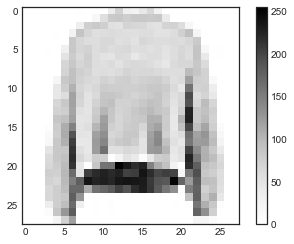

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

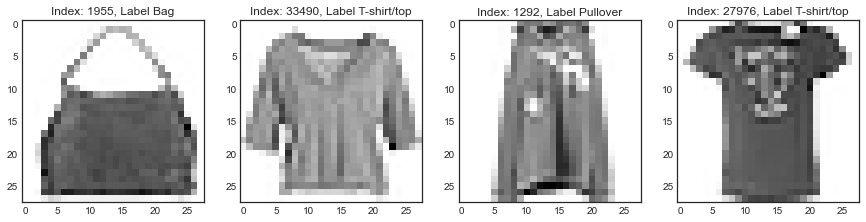

In [11]:
num_sample = 4

random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15,10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title("Index: {}, Label {}".format(idx, class_names[label]))
    

### 데이터 전처리
- Normalization

- flatten

- oss='sparse_categorical_crossentropy'

In [16]:
x_train = (x_train.reshape(-1, 28 * 28)) / 255.
x_val = (x_val.reshape(-1, 28 * 28)) / 255.
x_test = (x_test.reshape(-1, 28 * 28)) / 255.

### 모델 구성 (함수형 API)

In [18]:
input = Input(shape=(784, ), name='input')
hidden1 = Dense(256, activation='relu', name='hiddne1')(input)
hidden2 = Dense(128, activation='relu', name='hiddne2')(hidden1)
hidden3 = Dense(64, activation='relu', name='hiddne3')(hidden2)
hidden4 = Dense(32, activation='relu', name='hiddne4')(hidden3)
output = Dense(10, activation='softmax', name='output')(hidden4)

model = Model(inputs=[input], outputs=[output])

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hiddne1 (Dense)             (None, 256)               200960    
                                                                 
 hiddne2 (Dense)             (None, 128)               32896     
                                                                 
 hiddne3 (Dense)             (None, 64)                8256      
                                                                 
 hiddne4 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainable

In [20]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 모델 컴파일

In [22]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['acc'])

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [24]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/10
329/329 [==============================] - 2s 3ms/step - loss: 0.9517 - acc: 0.6911 - val_loss: 0.6041 - val_acc: 0.7716
Epoch 2/10
329/329 [==============================] - 1s 3ms/step - loss: 0.5414 - acc: 0.8069 - val_loss: 0.6157 - val_acc: 0.7824
Epoch 3/10
329/329 [==============================] - 1s 3ms/step - loss: 0.4791 - acc: 0.8314 - val_loss: 0.5172 - val_acc: 0.8308
Epoch 4/10
329/329 [==============================] - 1s 3ms/step - loss: 0.4656 - acc: 0.8383 - val_loss: 0.5495 - val_acc: 0.7858
Epoch 5/10
329/329 [==============================] - 1s 3ms/step - loss: 0.4447 - acc: 0.8444 - val_loss: 0.6949 - val_acc: 0.8122
Epoch 6/10
329/329 [==============================] - 1s 3ms/step - loss: 0.4520 - acc: 0.8483 - val_loss: 0.6880 - val_acc: 0.7464
Epoch 7/10
329/329 [==============================] - 1s 3ms/step - loss: 0.4352 - acc: 0.8528 - val_loss: 0.5249 - val_acc: 0.8164
Epoch 8/10
329/329 [==============================] - 1s 3ms/step - loss: 0.

### 학습 결과 시각화

In [25]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

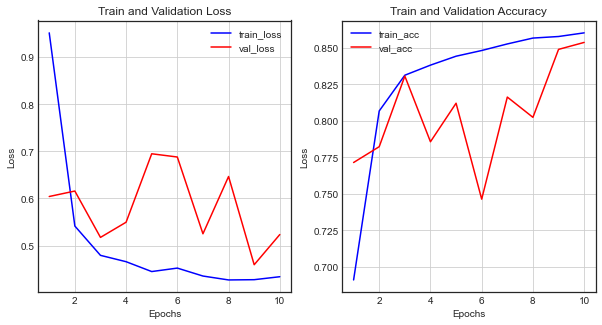

In [26]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='red', label='val_acc')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()

plt.show()


### 다른 옵티마이저로 실행
- 아래의 과정 다시 실행
  - 데이터셋 로드
  - 데이터 전처리
  - 모델 구성


In [27]:
from tensorflow.keras.optimizers import SGD 

In [28]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01),
              metrics=['acc'])

In [29]:
history2 = model.fit(x_train, y_train,
                     epochs=10,
                     batch_size=128,
                     validation_data=(x_val, y_val))

Epoch 1/10
329/329 [==============================] - 1s 3ms/step - loss: 0.3255 - acc: 0.8837 - val_loss: 0.4074 - val_acc: 0.8727
Epoch 2/10
329/329 [==============================] - 1s 2ms/step - loss: 0.3128 - acc: 0.8861 - val_loss: 0.4350 - val_acc: 0.8617
Epoch 3/10
329/329 [==============================] - 1s 2ms/step - loss: 0.3103 - acc: 0.8856 - val_loss: 0.3979 - val_acc: 0.8725
Epoch 4/10
329/329 [==============================] - 1s 2ms/step - loss: 0.3062 - acc: 0.8871 - val_loss: 0.4376 - val_acc: 0.8528
Epoch 5/10
329/329 [==============================] - 1s 2ms/step - loss: 0.3044 - acc: 0.8860 - val_loss: 0.4025 - val_acc: 0.8726
Epoch 6/10
329/329 [==============================] - 1s 2ms/step - loss: 0.3031 - acc: 0.8873 - val_loss: 0.3957 - val_acc: 0.8722
Epoch 7/10
329/329 [==============================] - 1s 2ms/step - loss: 0.3015 - acc: 0.8876 - val_loss: 0.4034 - val_acc: 0.8724
Epoch 8/10
329/329 [==============================] - 1s 2ms/step - loss: 0.

In [30]:
history2.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

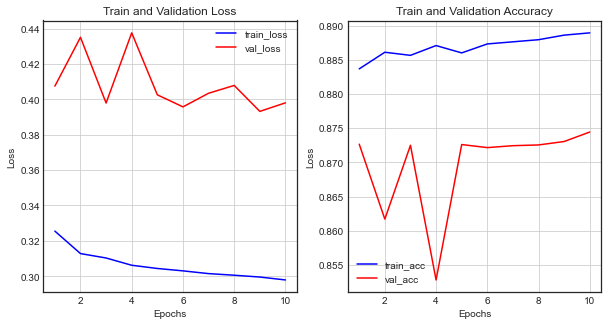

In [31]:
history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='red', label='val_acc')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()

plt.show()


### 모델 평가 (1)
- optimizer: SGD()로 학습한 모델

- evaluate

In [32]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4463 - acc: 0.8672


[0.4462531805038452, 0.8672000169754028]

### 학습된 모델을 통해 값 예측

In [33]:
pred_ys = model.predict(x_test)

print(pred_ys.shape)
np.set_printoptions(precision=7)
print(pred_ys[0])

313/313 [==============================] - 0s 896us/step
(10000, 10)
[1.1318780e-23 7.4690169e-33 4.7383596e-37 9.3003791e-33 0.0000000e+00
 3.6187973e-02 3.8461410e-27 1.5277857e-02 2.3616985e-18 9.4853419e-01]


Text(0.5, 1.0, 'Predicted Class: Ankle boot')

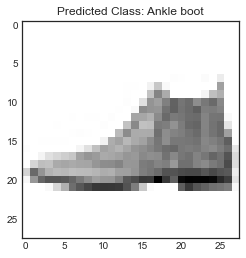

In [35]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.imshow(x_test[0].reshape(-1, 28))
plt.title("Predicted Class: {}".format(class_names[arg_pred_y[0]]))

In [45]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(pred_ys),
                                         class_names[y_test]),color=color)
    
def plot_value_array(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), pred_ys, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys) 
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
        

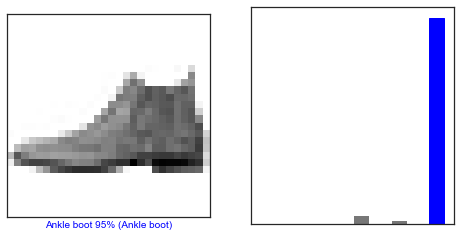

In [47]:
i = 0
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1,2,2)
plot_value_array(i, pred_ys, y_test)
plt.show()

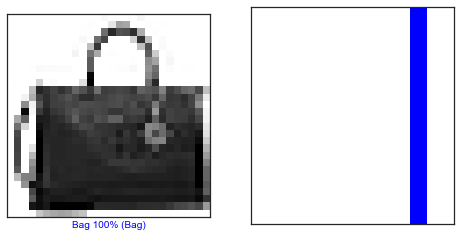

In [53]:
i = 30
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1,2,2)
plot_value_array(i, pred_ys, y_test)
plt.show()

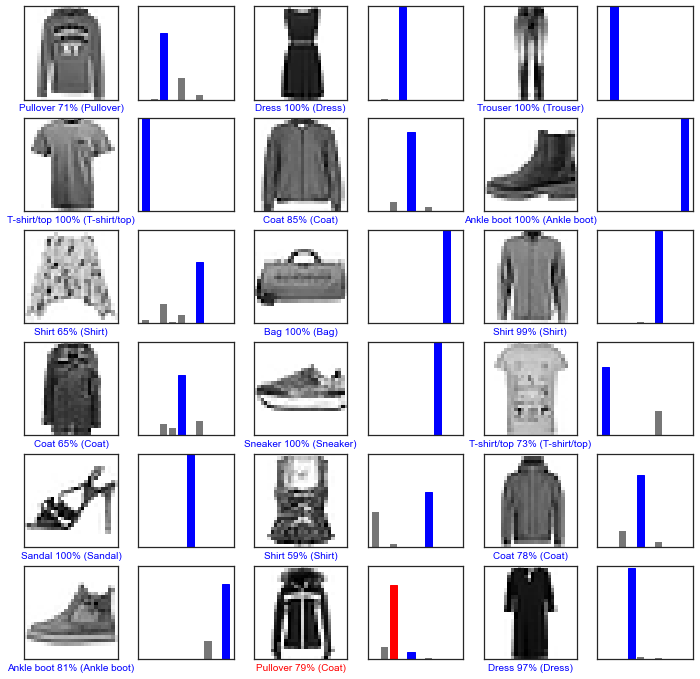

In [61]:
num_rows = 6
num_cols = 3

num_images = num_rows * num_cols 

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2*num_cols, 2*idx+1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1,28,28))
    plt.subplot(num_rows, 2*num_cols, 2*idx+2)
    plot_value_array(num, pred_ys, y_test)

plt.show()        

### 모델 평가(2)
- optimizer: SGD()로 설정한 모델

- 혼동 행렬 (Confusion Matrix)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
sns.set(style='white')

from tensorflow.keras.utils import to_categorical 

In [63]:
y_test_che = to_categorical(y_test)
y_test_che.shape

(10000, 10)

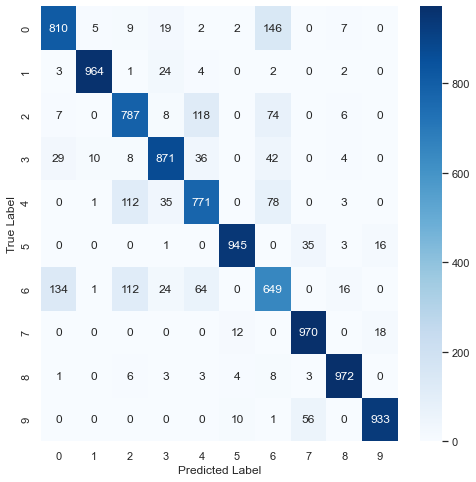

In [67]:
plt.figure(figsize=(8,8))
cm2 = confusion_matrix(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys,axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 모델 평가 (3)
- optimizer: SGD()로 설정한 모델

- 분류 보고서

In [68]:
print(classification_report(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.76      0.79      0.77      1000
           3       0.88      0.87      0.88      1000
           4       0.77      0.77      0.77      1000
           5       0.97      0.94      0.96      1000
           6       0.65      0.65      0.65      1000
           7       0.91      0.97      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

